### Cleaning, tidying and re-arranging your data

Practice with a real data set, grouping and transforming

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring

Crop production worldwide for a huge range of crops is available here:

    https://www.fao.org/faostat/en/#data/QCL
        
Download the data for blueberries from North and South America, Europe, Africa and total world production

In [22]:
df = pd.read_csv('../Datasets/FAOSTAT_data_blueberries.csv')

In [50]:
df.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1991,1991,ha,202.0,Im,FAO data based on imputation methodology
1,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1992,1992,ha,212.0,Im,FAO data based on imputation methodology
2,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1993,1993,ha,NaN,M,Data not available


In [3]:
df.shape

(3641, 14)

In [4]:
df.columns.values

array(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'], dtype=object)

The "Element" and "Unit" columns are labels for the "Values"

'Element' includes Area, Yeild, and Production, and 'Units' gives the approporiate units

In [5]:
df["Element"].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [6]:
df["Unit"].unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

There is lots of rubbish here we don't need.  
We can make a new dataframe from selected columns:

In [23]:
bb = df[['Area', 'Year','Element', 'Unit','Value']]

or drop columns from the dataframe

In [24]:
bb = df.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code', 'Item Code (FAO)', 'Item', 'Year Code', 'Flag', 'Flag Description'])

In [25]:
bb.head(3)

,Area,Element,Year,Unit,Value
0,Australia,Area harvested,1991,ha,202.0
1,Australia,Area harvested,1992,ha,212.0
2,Australia,Area harvested,1993,ha,NaN


Let's look first at the just hectares of land cropped for blueberries.  We'll subset the dataframe to get just the rows with 'Area harvested' in the 'Element' column.

In [26]:
bb_land = bb[bb["Element"]=='Area harvested']

Value is a bit ambiguous now it is all Area harvested.   We'll rename it hectares

In [27]:
bb_land = bb_land.rename(columns = {'Value':'Hectares'}, errors="raise")

<AxesSubplot:xlabel='Year', ylabel='Hectares'>

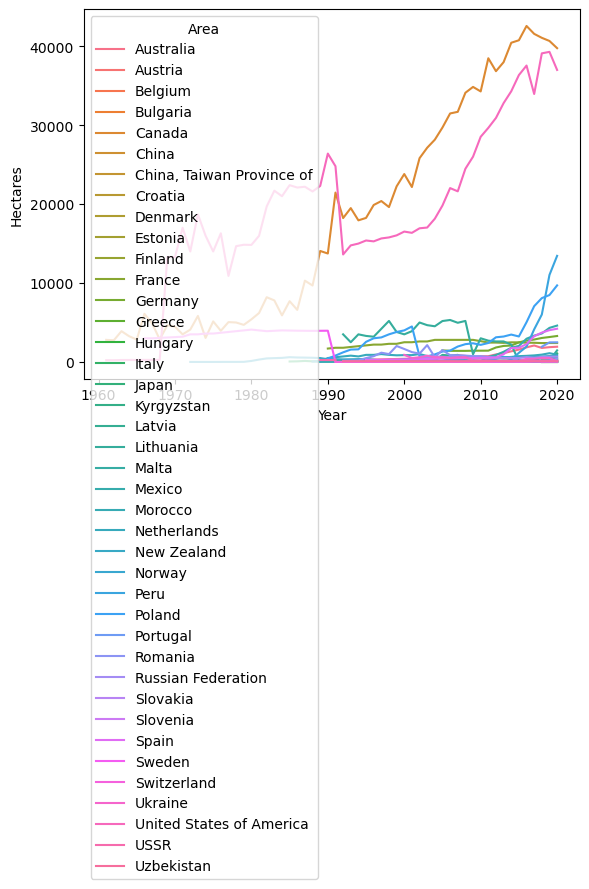

In [30]:
sns.lineplot(data=bb_land, x="Year", y="Hectares", hue="Area")

There is too much going on here to be informative.  Let's find out who the big blueberry players are and focus on them.

We want to know the top five countries for 'Area harvested', 'Yield', 'Production'.  
We already have a subsetted dataframe for Area unde cultivation:

In [63]:
bb_land.groupby('Area').max().reset_index().sort_values(by=['Hectares'], ascending=False).head(5)

,Area,Element,Year,Unit,Hectares
4,Canada,Area harvested,2020,ha,42570.0
38,United States of America,Area harvested,2020,ha,39290.0
26,Peru,Area harvested,2020,ha,13443.0
27,Poland,Area harvested,2020,ha,9700.0
19,Lithuania,Area harvested,2020,ha,5320.0


For Yield and Production:  

In [93]:
bb_yeild = bb[bb["Element"]=='Yield']
bb_yeild = bb_yeild.rename(columns = {'Value':'hg/ha'}, errors="raise")
bb_yeild.groupby('Area').max().reset_index().sort_values(by=['hg/ha'], ascending=False).head(5)

,Area,Element,Year,Unit,hg/ha
26,Spain,Yield,2020,hg/ha,170319.0
19,Peru,Yield,2020,hg/ha,157719.0
11,Italy,Yield,2020,hg/ha,139537.0
28,Switzerland,Yield,2020,hg/ha,138750.0
16,Netherlands,Yield,2020,hg/ha,116873.0


In [92]:
bb_prod = bb[bb["Element"]=='Production']
bb_prod = bb_prod.rename(columns = {'Value':'tonnes'}, errors="raise")
bb_prod.groupby('Area').max().reset_index().sort_values(by=['tonnes'], ascending=False).head(5)

,Area,Element,Year,Unit,tonnes
38,United States of America,Production,2020,tonnes,306900.0
4,Canada,Production,2020,tonnes,211191.0
26,Peru,Production,2020,tonnes,180300.0
27,Poland,Production,2020,tonnes,55300.0
33,Spain,Production,2020,tonnes,53380.0


We can now do plots for just the major players, Spain, Peru, Italy, Switzerland, Netherlands, USA, Canada, Poland,Lithuania.  
We want to subset the origin dataframe to just these.   We'll need them as a list.  We could type is out, or we can pull it from the tables above.

In [96]:
prod_df = bb_prod.groupby('Area').max().reset_index().sort_values(by=['tonnes'], ascending=False).head(5)
prod_list = prod_df['Area'].tolist()

In [97]:
prod_list 

['United States of America', 'Canada', 'Peru', 'Poland', 'Spain']

In [98]:
yeild_df = bb_yeild.groupby('Area').max().reset_index().sort_values(by=['hg/ha'], ascending=False).head(5)
yeild_list = yeild_df['Area'].tolist()
land_df = bb_land.groupby('Area').max().reset_index().sort_values(by=['Hectares'], ascending=False).head(5)
land_list = land_df['Area'].tolist()

In [75]:
yeild_list

['Spain', 'Peru', 'Italy', 'Switzerland', 'Netherlands']

In [76]:
land_list

['Canada', 'United States of America', 'Peru', 'Poland', 'Lithuania']

Combine the lists and get the unique values

In [77]:
top_bb = sorted(np.unique(prod_list+land_list+yeild_list))

In [78]:
top_bb

['Canada',
 'Italy',
 'Lithuania',
 'Netherlands',
 'Peru',
 'Poland',
 'Spain',
 'Switzerland',
 'United States of America']

Filter the dataframe by this list

In [81]:
top_land = bb_land[bb_land['Area'].isin(top_bb)]

<AxesSubplot:xlabel='Year', ylabel='Hectares'>

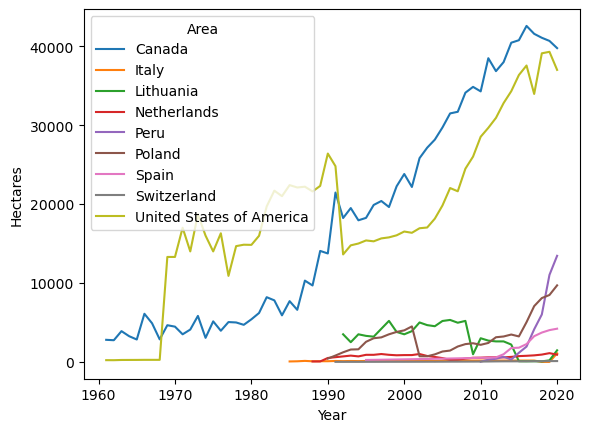

In [89]:
sns.lineplot(data=top_land, x="Year", y="Hectares", hue="Area")

Canada and the US have always had the most land under blueberry cultiviation, but the US's domination dropped in 1990

<AxesSubplot:xlabel='Year', ylabel='tonnes'>

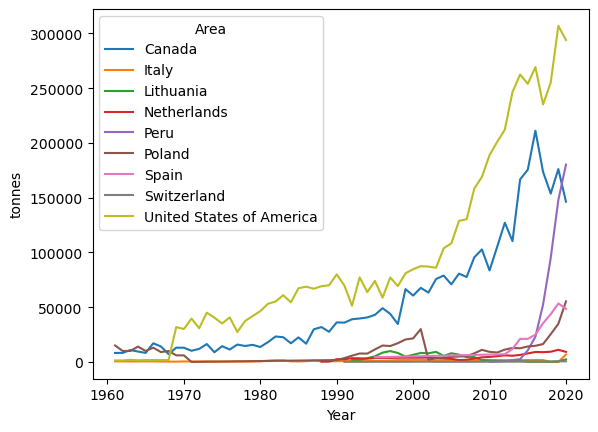

In [100]:
top_prod = bb_prod[bb_prod ['Area'].isin(top_bb)]
sns.lineplot(data=top_prod, x="Year", y="tonnes", hue="Area")

Although Canada has more land under blueberries, the US produces a bigger crop.

<AxesSubplot:xlabel='Year', ylabel='hg/ha'>

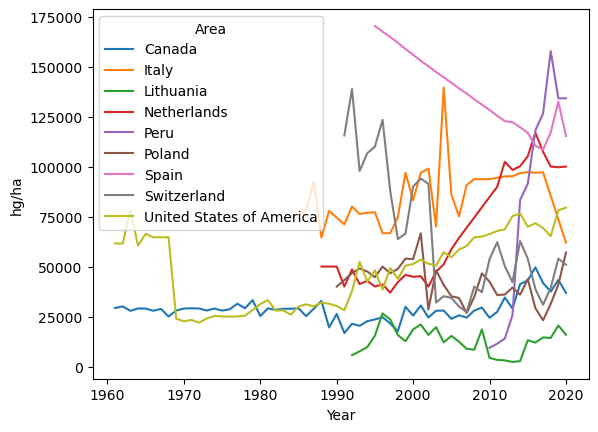

In [105]:
top_yeild = bb_yeild[bb_yeild ['Area'].isin(top_bb)]
sns.lineplot(data=top_yeild, x="Year", y="hg/ha", hue="Area")

Neither Canada or the US is the most efficient blueberry producer - that is Peru or Spain, but the Netherlands are improving

#### Re-grouping

What about combining the data for each country into areas? Can we compare Europe to North America and South America?  

We need to list which countries are in which region and make a new colum 'Region' which we will fill depending on the value in 'Area'.  First list all the countries and paste these into new lists.  We are listing Mexico with South America as climate-wise it is more similar, in that blueberries can only be growen there in upland regions.  We're listing as Europe quite widely, adn lumping everywhe3re else in to Rest-of-world

In [107]:
df["Area"].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'China',
       'China, Taiwan Province of', 'Croatia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Japan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Malta', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Peru',
       'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United States of America', 'USSR', 'Uzbekistan'], dtype=object)

In [110]:
Europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'Estonia','Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Mexico',
        'Netherlands','Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland']
N_Am = ['Canada', 'United States of America']
S_Am = ['Mexico','Peru']

Now we make the new Column

In [116]:
bb["Region"]='RoW'
bb.loc[bb.Area.isin(Europe),'Region']='Europe'
bb.loc[bb.Area.isin(N_Am),'Region']='N_America'
bb.loc[bb.Area.isin(S_Am),'Region']='S_America'

In [117]:
bb.head(3)

,Area,Element,Year,Unit,Value,Region
0,Australia,Area harvested,1991,ha,202.0,RoW
1,Australia,Area harvested,1992,ha,212.0,RoW
2,Australia,Area harvested,1993,ha,NaN,RoW


In [118]:
bb["Element"].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [125]:
bb["Unit"].unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

<AxesSubplot:xlabel='Year', ylabel='tonnes'>

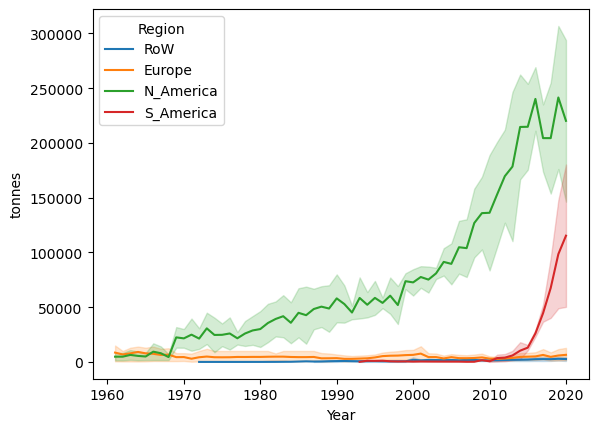

In [124]:
prod=bb[(bb.Element == 'Production')]
prod = prod.rename(columns = {'Value':'tonnes'}, errors="raise")
sns.lineplot(data=prod, x="Year", y="tonnes", hue="Region")

<AxesSubplot:xlabel='Year', ylabel='hg/ha'>

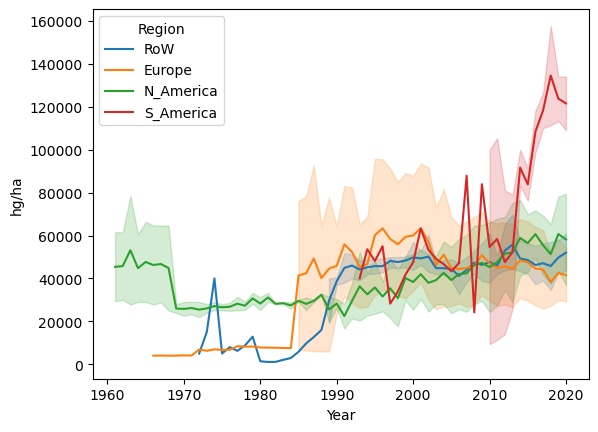

In [129]:
Yield=bb[(bb.Element == 'Yield')]
Yield = Yield.rename(columns = {'Value':'hg/ha'}, errors="raise")
sns.lineplot(data=Yeild, x="Year", y="hg/ha", hue="Region")

Seaborn has given us confidence intervals

#### Transforming data   

Let's convert hectares to the international unit of measurement of the size of Wales (or football pitches).  
Wales is 2.0779 Million hecatares  
A hectares is 1.86 Football pitches  

In [13]:
bb_land["Wales"] = bb_land["Hectares"]/2077900

In [14]:
bb_land["Pitches"] = bb_land["Hectares"]*1.86

In [15]:
bb_land.head(3)

,Area,Element,Year,Unit,Hectares,Wales,Pitches
0,Australia,Area harvested,1991,ha,202.0,0.000097,375.72
1,Australia,Area harvested,1992,ha,212.0,0.000102,394.32
2,Australia,Area harvested,1993,ha,NaN,NaN,NaN


This worked as the values in "Hectares" are numeric.  If we try this on a string we get something else:

In [16]:
bb_land["Region"] = bb_land["Area"]*12

In [17]:
bb_land.head(3)

,Area,Element,Year,Unit,Hectares,Wales,Pitches,Region
0,Australia,Area harvested,1991,ha,202.0,0.000097,375.72,AustraliaAustraliaAustraliaAustraliaAustraliaA...
1,Australia,Area harvested,1992,ha,212.0,0.000102,394.32,AustraliaAustraliaAustraliaAustraliaAustraliaA...
2,Australia,Area harvested,1993,ha,NaN,NaN,NaN,AustraliaAustraliaAustraliaAustraliaAustraliaA...


Tidying that up...

In [19]:
bb_land.drop(columns=['Region'], inplace=True)
bb_land.head(3)

,Area,Element,Year,Unit,Hectares,Wales,Pitches
0,Australia,Area harvested,1991,ha,202.0,0.000097,375.72
1,Australia,Area harvested,1992,ha,212.0,0.000102,394.32
2,Australia,Area harvested,1993,ha,NaN,NaN,NaN


This is a very simple traqnsformation.  What if we want to do something fancier?  

### Lamba functions for transforming data

What if we want to look at the effect of membership of the EU on blueberry production.
We could make a list of countries in the EU and use 'isin' as we did with the creation of the Region column, but countries joined the EU at different dates.  We need to consider country and date.  It will be easiest to write a small function.

We start with a dict of joining dates

In [165]:
join_date = {'France':1952, 'Germany':1952, 'Belgium':1952,'Italy':1952,'Netherlands':1952, 'Denmark':1973, 'Greece':1981, 'Portugal':1986, 'Spain':1986,'Austria':1995, 'Finland':1995, 'Sweden':1995 , 'Estonia':2004, 'Hungary':2004, 'Latvia':2004, 'Lithuania':2004, 'Malta':2004, 'Poland':2004, 'Slovakia':2004, 'Slovenia':2004,'Bulgaria':2007, 'Romania':2007}

Check!

In [164]:
join_date.get('France')

1952

The function will check whether a country has joined the EU by seeing if it is a key in the dict.  It will then look up the joining date to see if the year we are checking is after the joining date.

In [173]:
def EU_mem(Area,Year):
    if Area in join_date.keys():
        if int(Year) >= join_date.get(Area):
            return 'EU'
        else:
            return 'non_EU'
    else:
        return 'non_EU'

Check!

In [175]:
EU_mem('Slovakia','1953')

'non_EU'

In [177]:
EU_mem('France',1983)

'EU'

Apply to the dataframe

In [178]:
df['EU'] = df.apply(lambda df: EU_mem(df['Area'],df['Year']),axis=1)

In [179]:
df.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Region,EU
0,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1991,1991,ha,202.0,Im,FAO data based on imputation methodology,RoW,non_EU
1,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1992,1992,ha,212.0,Im,FAO data based on imputation methodology,RoW,non_EU
2,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1993,1993,ha,NaN,M,Data not available,RoW,non_EU


For European countries does membership of the EU affect the efficiency of blueberry production?

In [183]:
Yield['EU'] = Yield.apply(lambda Yield: EU_mem(Yield['Area'],Yield['Year']),axis=1)

Check!

In [182]:
Yield[Yield["Area"]=='France'].tail(3)

,Area,Element,Year,Unit,hg/ha,Region,EU
773,France,Yield,2016,hg/ha,27484.0,Europe,EU
774,France,Yield,2017,hg/ha,34949.0,Europe,EU
775,France,Yield,2018,hg/ha,38140.0,Europe,EU


<AxesSubplot:xlabel='Year', ylabel='hg/ha'>

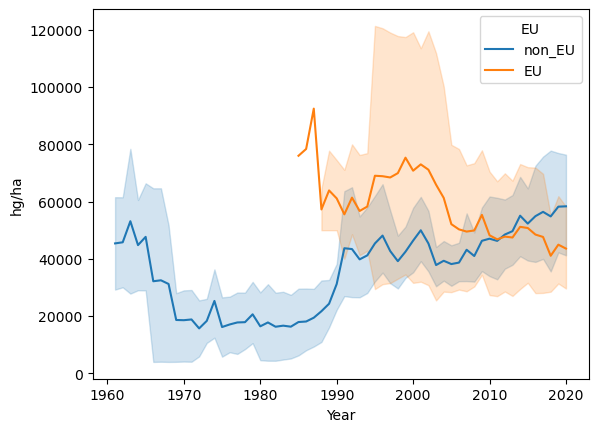

In [184]:
sns.lineplot(data=Yield, x="Year", y="hg/ha", hue="EU")

EU membership seems to have had a deleterious effect on the efficiency of blueberry production.

Check annother crop - try sugar beet.  

In [ ]:
Use the same method to examine a dataset on Flu deaths/size of conservation areas/cases of phytophera